<a href="https://colab.research.google.com/github/LAMATH100/COFFEE-SALE-DASHBOARD/blob/main/SOCIAL_MEDIA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unveiling Social Media Trends Through Data Analysis - By Ayantola M.I**

Objectives:

The project aimed to understand user behavior and trends on social media by analyzing data on demographics, usage patterns, and engagement metrics.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
social = files.upload()

Saving social-media.csv to social-media (1).csv


In [ ]:
df = pd.read_csv("social-media.csv")

In [ ]:
df.head(n=5)

,UserId,UsageDuraiton,Age,Country,TotalLikes
0,1,2,55,Turkey,5
1,2,6,45,Canada,10
2,3,3,50,Ireland,7
3,4,4,35,South Africa,5
4,5,1,58,Turkey,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserId         63 non-null     int64 
 1   UsageDuraiton  63 non-null     int64 
 2   Age            63 non-null     int64 
 3   Country        63 non-null     object
 4   TotalLikes     63 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.6+ KB


In [ ]:
df['UserId'] = df['UserId'].astype(object)

In [ ]:
df.shape

(63, 5)

In [ ]:
df.describe()

,UsageDuraiton,Age,TotalLikes
count,63.000000,63.000000,63.000000
mean,4.000000,33.777778,5.317460
std,2.879292,15.540213,6.135106
min,1.000000,18.000000,0.000000
25%,2.000000,19.000000,1.500000
50%,3.000000,26.000000,4.000000
75%,5.000000,50.000000,6.000000
max,13.000000,60.000000,28.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
UserId,0
UsageDuraiton,0
Age,0
Country,0
TotalLikes,0


In [ ]:
#Rename the "UsageDuration" column to "UsageDuration" for consistency

df.rename(columns={'UsageDuraiton':'UsageDuration'},inplace=True)

In [ ]:
#Displays the name of the columns in the data frame
df.columns

Index(['UserId', 'UsageDuraiton', 'Age', 'Country', 'TotalLikes'], dtype='object')

In [ ]:
#Check for duplicate rows in the DataFrame and Count them
df.duplicated().sum()

0

In [ ]:
#Print the number of duplicate rows found
print("Number",df.duplicated().sum())


Number 0


In [ ]:
# Remove duplicate rows from the DataFrame if any are found
df = df.drop_duplicates()

In [ ]:
#Display the data types of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
UserId           object
UsageDuraiton     int64
Age               int64
Country          object
TotalLikes        int64
dtype: object


In [ ]:
#Convert 'userid' from integer to object
df['UserId'] = df['UserId'].astype(object)

In [ ]:
#Confrirm the change by displaying the data types again
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
UserId           object
UsageDuraiton     int64
Age               int64
Country          object
TotalLikes        int64
dtype: object


In [ ]:
#Set the size of the figure for better visibility
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Values')

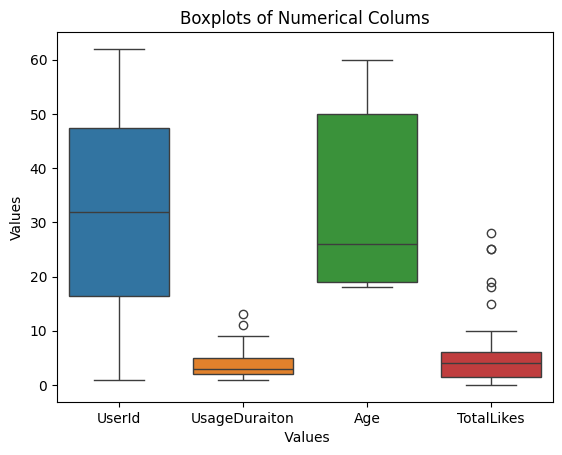

In [ ]:
#Create a grid of boxplots for each numerical column
sns.boxplot(data= df.select_dtypes(include = ['float64','int64']))
#Set the tittle and labels
plt.title('Boxplots of Numerical Colums') #Set the Title
plt.xlabel(' Values') #Set the X-axis label
plt.ylabel('Values') #Set the Y-axis label

The box plots give us a quick visual summary of user age, activity, and popularity on social media, highlighting any unusual patterns or outliers.

In [ ]:
#Print the Shape of the data after removing the outliers
print("Data shape after removing outliers:",df.shape)

Data shape after removing outliers: (63, 5)


# **Univariate Analysis**

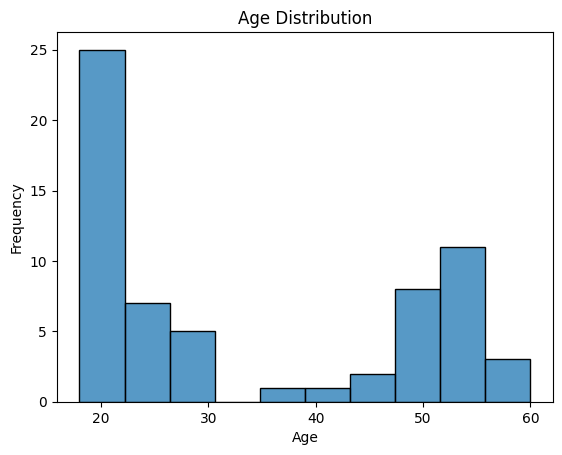

In [ ]:
#Create a histogram to show the distribution of ages
sns.histplot(df['Age'], bins = 10)
#Set the title of the plot
plt.title('Age Distribution')
#LAbel the y-axis as 'Frequency'
plt.ylabel('Frequency')

#Display the plot
plt.show()

Insight: Age bracket of 20-30 have the highest socila media usage.This means that people in their 20s and early 30s are the most active users on social media platforms.

# **Visualize USers By Country**

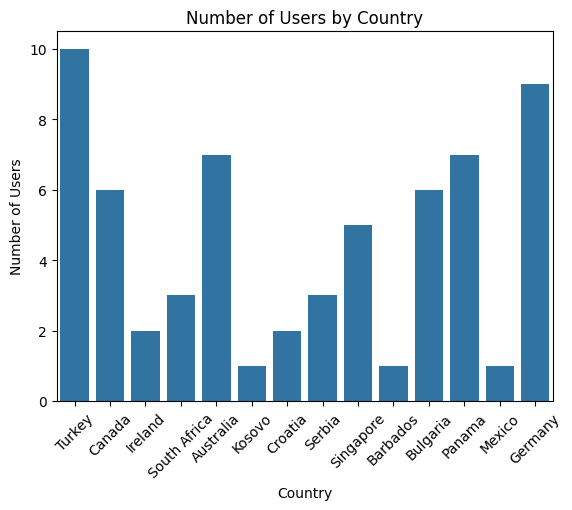

In [ ]:
#Create a count plot to show the number of users per Country
sns.countplot(x = 'Country', data = df)
#Set the title of the plot
plt.title('Number of Users by Country')
#Label the x-axis as 'Number of Users'
plt.ylabel('Number of Users')
#Rotate x-axis labels for better readability
plt.xticks(rotation = 45)
#Display the plot
plt.show()

Insight: The countplot shows which countries have the most social media users. Turkey and Germany appear to have the largest number of people using social media among the countries included in the data.

# **Bivariate Analysis**

<Axes: xlabel='UsageDuration', ylabel='TotalLikes'>

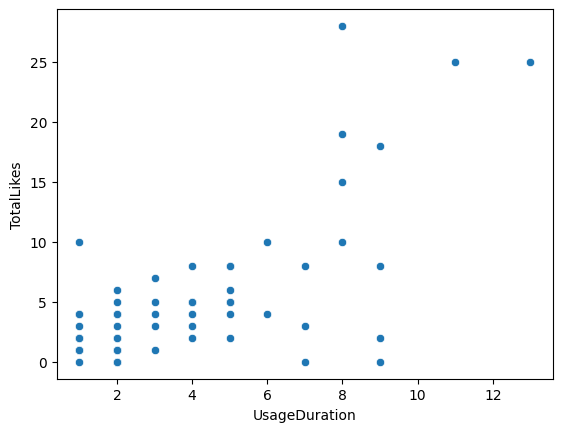

In [ ]:
#Create a Scatter plot to show the relationship between usage duration and total likes
sns.scatterplot(x= 'UsageDuration', y = 'TotalLikes', data = df)

Insight: The scatterplot shows the relationship between how long someone uses social media and how many likes they get. The people who spend more time on social media tend to receive more likes overall.

# **Boxplot**

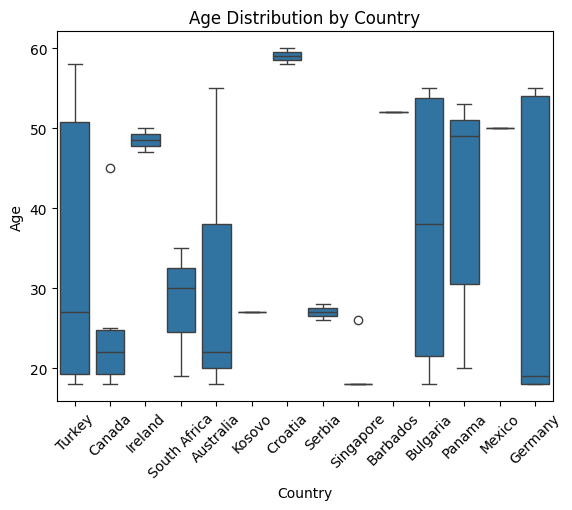

In [ ]:
#Create a boxplot to show the distribution of age by Country
sns.boxplot(x = 'Country', y = 'Age', data = df)
#Set the title of the plot
plt.title('Age Distribution by Country')
#Label the x-axis as 'Age'
plt.xlabel('Country')
#LAbel the y-axis as Age
plt.ylabel('Age')
#Rotate x-axis label for better readability
plt.xticks(rotation = 45)
#Display the plot
plt.show()


Insight: Reveals the most common age range of social media users (in this case, 20-30 years old).

# **Bar Plot**

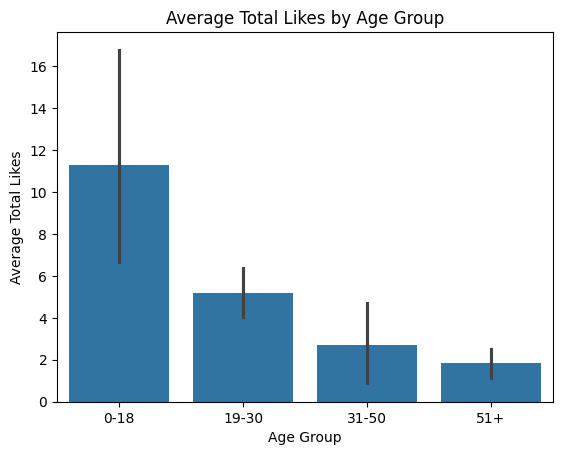

In [ ]:
#Create age groups using pandas cut funtion
df['AgeGroup'] = pd.cut(df['Age'], bins = [0,18,30,50,100], labels = ['0-18','19-30','31-50','51+'])
#Create a bar plot to show average totla likes by age group
sns.barplot(x = 'AgeGroup', y = 'TotalLikes', data = df)
#Set the title of the plot
plt.title('Average Total Likes by Age Group')
#Label the xlabel('Age Group)
plt.xlabel('Age Group')
#Label the y-axis as Average total likes
plt.ylabel('Average Total Likes')
#Display the barplot
plt.show()

Insight:The bar plot shows how many likes people get on average, based on their age group. 0-18 age group tends to receive the most likes on their social media posts.

# **Heatmap of Correlations**

NameError: name 'correlation' is not defined

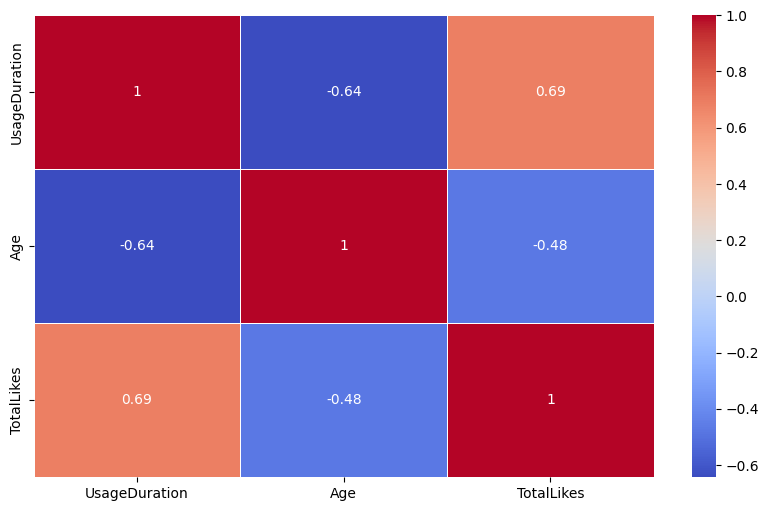

In [ ]:
#Select all the numerical columns in the dataframe, store them in a variable#Called nemeric-cols
#Select all the numerical columns in the dataframe, store them in a variable#Called nemeric-cols
numeric_cols = df.select_dtypes(include = ['float64','int64']).columns
#Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()
#Create a heatmap using seaborn to visualize the correlation matrix
plt.figure(figsize=(10,6))
#Create a heatmap to visualize the correlatipon matrix
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
#Create a heatmap to visualize the correlatipon matrix
sns.heatmap(correlation-matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)



Insight:The heatmap strengthens the observation from the scatterplot by showing a positive correlation between usage duration and total likes. This suggests that increased engagement (usage duration) leads to greater social media success (total likes).

Insight: This suggest that there will be a positive correlation between longer user duration and the likes the user get

# **Seaborn's pairplot to create scatter plots and histograms for pairs of variables**

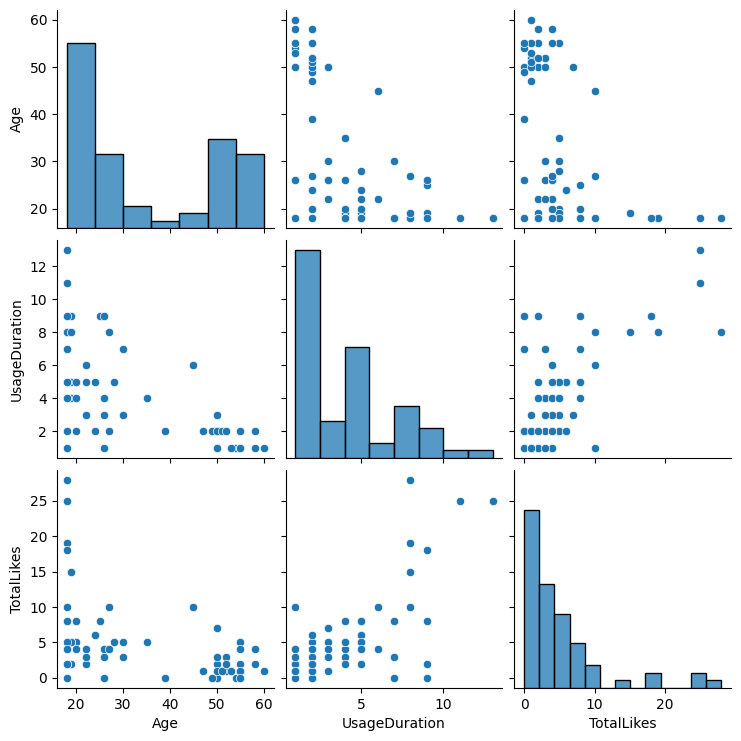

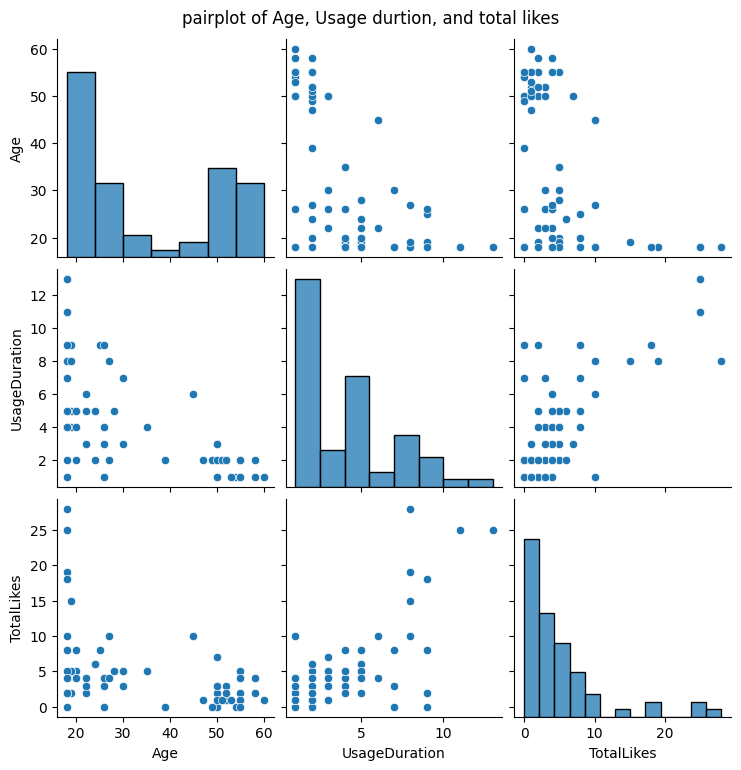

In [ ]:
sns.pairplot(df,vars =['Age','UsageDuration','TotalLikes'])
sns.pairplot(df,vars =['Age','UsageDuration','TotalLikes'])

#SET THE TITLE OF THE PAIRPLOT FOR BETTER UNDERSTANDING
plt.suptitle("pairplot of Age, Usage durtion, and total likes", y = 1.02)
plt.show()

Insight: The pairplot shows all the relationships between age, time spent on social media, and likes received in one place. The people who use social media longer tend to be younger and get more likes, all from looking at this plot.

# **BArplot to Show average total likes by age group and Country**

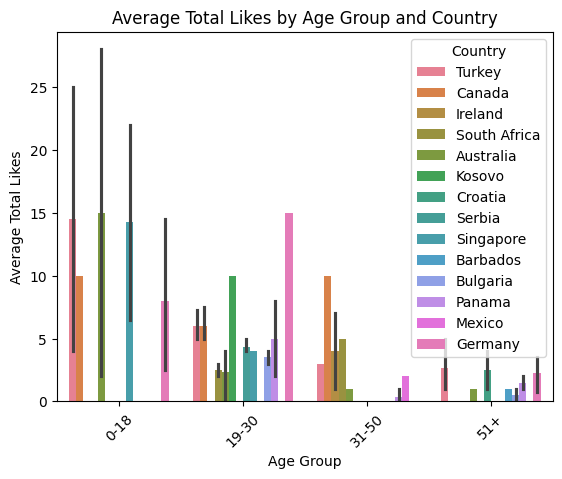

In [ ]:
#Create a group bar plot to show the average total likes
sns.barplot(x = 'AgeGroup', y = 'TotalLikes', hue = 'Country', data = df)
#Set the title of the plot
plt.title('Average Total Likes by Age Group and Country')
#Label the x-axis as 'Age Group'
plt.xlabel('Age Group')
# Label the y-axis
plt.ylabel('Average Total Likes')
plt.ylabel('Average Total Likes')
plt.xticks(rotation=45)
#Display the plot
plt.show()


Insight:users in Turkey in the 0-18 age group tend to get significantly more likes on average compared to users of the same age group in the United States or the United Kingdom. However, as age increases, these differences become less pronounced, suggesting that social media engagement patterns may vary across cultures but tend to converge with age.

In [ ]:
#import file
from google.colab import files
df.to_csv('Cleaned_social-media.csv', index=False)
files.download('Cleaned_social-media.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>